# Mapping Historical Los Angeles

This notebook begins the process of mapping historical Los Angeles. It does so by using a historical dataset developed by Ethington, Kooistra and DeYoung, scholars from the University of Southern California in 2000. 

Here, we will import the data and utilize data science methods to explore, filter, and visualize the data *spatially*.


## The Ethington Data

Los Angeles County Union Census Tract Data Series, 1940-1990

- [User guide](data/LAC4090v102_User_Guide.pdf)

In [1]:
# libraries to use
import geopandas as gpd
import pandas as pd

# Override notebook defaults
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# bring in the data
gdf = gpd.read_file('data/ethington.zip')

In [3]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Columns: 252 entries, AREA to geometry
dtypes: float64(82), geometry(1), int64(169)
memory usage: 3.2 MB


<AxesSubplot:>

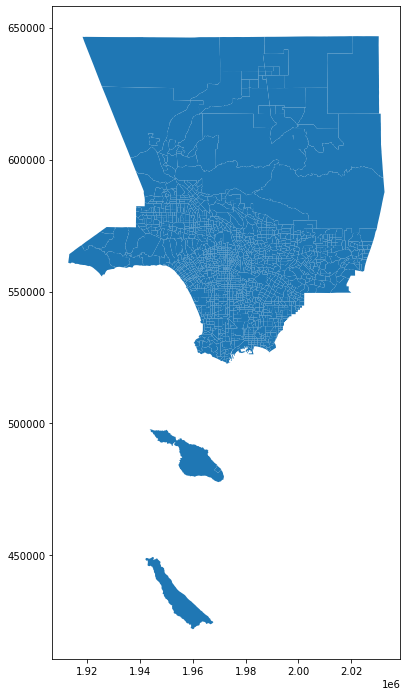

In [4]:
# plot it
gdf.plot(figsize=(12,12))

In [5]:
# show some random rows
gdf.sample(5)

AREA   PERIMETER   CTBNA  P40T  P40WNH  P40BNH  P40ONH  P40HIS  \
1058  6.925044e+05  3360.95861  273700   913     905       0       3       5   
1244  5.935614e+05  3486.41195  600201   556     540       0      14       2   
392   1.000274e+06  4384.36008  143200  1562    1551       6       2       3   
624   6.512678e+05  3229.94084  191600  4622    4580       0      24      18   
43    1.424543e+06  6718.28830  920023     6       6       0       0       0   

      P40TW  P40NATW  ...   O90BC  R90SH85  R90SC85  R90OT85  H90TOT  H90SFU  \
1058    910      819  ...   665.0   1538.0    741.0    435.0  1175.0   840.0   
1244    542      485  ...   853.0   1591.0   1836.0    419.0  1299.0   741.0   
392    1554     1423  ...   606.0   1107.0   1384.0    784.0  1936.0   392.0   
624    4598     3908  ...  1990.0   2574.0   2516.0   1718.0  2368.0   515.0   
43        6        5  ...   565.0    921.0    723.0    211.0   765.0   356.0   

      H90OTH  INC90MED    H90MVL  \
1058   335.0   40667.0  338041.0   
1244   558.0   16111.0   96829.0   
392   1544.0   32029.0  329323.0   
624   1853.0   19195.0  208955.0   
43     409.0   44107.0  213390.0   

                                               geometry  
1058  POLYGON ((1957583.447 555250.699, 1957853.585 ...  
1244  POLYGON ((1973062.043 549913.321, 1973061.851 ...  
392   POLYGON ((1966100.166 572508.197, 1966145.912 ...  
624   POLYGON ((1972258.279 565588.644, 1972248.290 ...  
43    POLYGON ((1953704.848 602766.135, 1953834.551 ...  

[5 rows x 252 columns]

In [6]:
# create a subset copy of the data just for the black relevant fields
black = gdf[['CTBNA','P40T','P50T','P60T','P70T','P80T','P90T','P40BNH','P50BNH','P60BNH','P70BNH','P80BNH','P90BNH','geometry']].copy()

In [7]:
black

CTBNA  P40T  P50T  P60T    P70T    P80T     P90T  P40BNH  P50BNH  \
0     900100   615   949   597   665.0  2559.0  12682.0       1      34   
1     900200  1312  2822  1568  1629.0  1439.0   1552.0       2      51   
2     901202  1063  1308  2831  1472.0  1999.0   3739.0       1       4   
3     900900  1150  2612   664   296.0   668.0   2578.0       3      33   
4     900300   522  1249   891  1119.0  1433.0   1972.0       2      17   
...      ...   ...   ...   ...     ...     ...      ...     ...     ...   
1651  297500  2700  1537  3535  3374.0  3303.0   3593.0      37       1   
1652  599100   881   369  1068   359.0   263.0    527.0       3       0   
1653  599100   881   369  1068   359.0   263.0    527.0       3       0   
1654  599000  1637  1506  1536  1572.0  2022.0   2918.0      18       4   
1655  599100   881   369  1068   359.0   263.0    527.0       3       0   

      P60BNH  P70BNH  P80BNH  P90BNH  \
0        119   140.0   124.0   975.0   
1          5     0.0    18.0    19.0   
2         49    80.0   100.0   153.0   
3        101    75.0    35.0    63.0   
4         50    25.0    29.0    34.0   
...      ...     ...     ...     ...   
1651      10    49.0    70.0   107.0   
1652      51     0.0     0.0    24.0   
1653      51     0.0     0.0    24.0   
1654      10     0.0     0.0     4.0   
1655      51     0.0     0.0    24.0   

                                               geometry  
0     POLYGON ((2010981.306 627195.895, 2010985.562 ...  
1     POLYGON ((2020599.176 646773.950, 2020593.421 ...  
2     POLYGON ((1970302.753 633587.024, 1970303.702 ...  
3     POLYGON ((1970159.706 646429.761, 1970530.071 ...  
4     POLYGON ((1987195.131 635140.066, 1987161.766 ...  
...                                                 ...  
1651  POLYGON ((1972858.977 524545.755, 1972849.417 ...  
1652  POLYGON ((1965591.754 488340.928, 1965611.619 ...  
1653  POLYGON ((1954734.236 494638.417, 1954673.281 ...  
1654  POLYGON ((1969234.878 484039.140, 1969281.131 ...  
1655  POLYGON ((1949084.443 444672.509, 1949184.382 ...  

[1656 rows x 14 columns]

In [8]:
# create new columns that normalizes the data (ie, percent black in each census tract for each year)
black['P40BNH_P']=black.P40BNH/black.P40T*100
black['P50BNH_P']=black.P50BNH/black.P50T*100
black['P60BNH_P']=black.P60BNH/black.P60T*100
black['P70BNH_P']=black.P70BNH/black.P70T*100
black['P80BNH_P']=black.P80BNH/black.P80T*100
black['P90BNH_P']=black.P90BNH/black.P90T*100


In [16]:
# create a subset of the data with white relevant fields
white = gdf[['CTBNA','P40T','P50T','P60T','P70T','P80T','P90T','P40WNH','P50WNH','P60WNH','P70WNH','P80WNH','P90WNH','geometry']].copy()

In [10]:
# create new columns that normalizes the data (ie, percent white in each census tract for each year)
white['P40WNH_P']=white.P40WNH/white.P40T*100
white['P50WNH_P']=white.P50WNH/white.P50T*100
white['P60WNH_P']=white.P60WNH/white.P60T*100
white['P70WNH_P']=white.P70WNH/white.P70T*100
white['P80WNH_P']=white.P80WNH/white.P80T*100
white['P90WNH_P']=white.P90WNH/white.P90T*100


In [17]:
# create a subset of the data with white relevant fields
hispanic = gdf[['CTBNA','P40T','P50T','P60T','P70T','P80T','P90T','P40HIS','P50HIS','P60HIS','P70HIS','P80HIS','P90HIS','geometry']].copy()

In [18]:
# create new columns that normalizes the data (ie, percent white in each census tract for each year)
hispanic['P40HIS_P']=hispanic.P40HIS/hispanic.P40T*100
hispanic['P50HIS_P']=hispanic.P50HIS/hispanic.P50T*100
hispanic['P60HIS_P']=hispanic.P60HIS/hispanic.P60T*100
hispanic['P70HIS_P']=hispanic.P70HIS/hispanic.P70T*100
hispanic['P80HIS_P']=hispanic.P80HIS/hispanic.P80T*100
hispanic['P90HIS_P']=hispanic.P90HIS/hispanic.P90T*100


In [19]:
hispanic.sample(5)

CTBNA  P40T  P50T  P60T    P70T    P80T    P90T  P40HIS  P50HIS  \
349   430600  1051  8378  4559  4936.0  4635.0  4275.0      10       0   
1621  577100  5957  5710  5432  6428.0  5806.0  6390.0       3       0   
917   701202  1037  1280  1276  2970.0  3096.0  3019.0       4       0   
1014  531901  1561  3311  3624  4560.0  4918.0  5970.0       2     206   
976   222700  2847  2940  2956  2549.0  2863.0  2750.0      57       0   

      P60HIS  P70HIS  P80HIS  P90HIS  \
349       48   225.0   227.0   320.0   
1621      44   204.0   367.0   641.0   
917       25    85.0    94.0   151.0   
1014    1119  3238.0  4222.0  5599.0   
976      200   168.0   209.0   211.0   

                                               geometry  P40HIS_P  P50HIS_P  \
349   POLYGON ((1997067.958 573966.227, 1997067.909 ...  0.951475  0.000000   
1621  POLYGON ((1985669.600 530551.457, 1985771.500 ...  0.050361  0.000000   
917   POLYGON ((1954990.891 559832.802, 1955137.948 ...  0.385728  0.000000   
1014  POLYGON ((1986449.662 557493.277, 1986486.594 ...  0.128123  6.221685   
976   POLYGON ((1973806.171 558119.353, 1973833.817 ...  2.002107  0.000000   

       P60HIS_P   P70HIS_P   P80HIS_P   P90HIS_P  
349    1.052862   4.558347   4.897519   7.485380  
1621   0.810015   3.173615   6.321047  10.031299  
917    1.959248   2.861953   3.036176   5.001656  
1014  30.877483  71.008772  85.847906  93.785595  
976    6.765900   6.590820   7.300035   7.672727

In [12]:
black_var_list = ['P40BNH_P',
'P50BNH_P',
'P60BNH_P',
'P70BNH_P',
'P80BNH_P',
'P90BNH_P']

In [13]:
white_var_list = ['P40WNH_P',
'P50WNH_P',
'P60WNH_P',
'P70WNH_P',
'P80WNH_P',
'P90WNH_P']

In [20]:
hispanic_var_list = ['P40HIS_P',
'P50HIS_P',
'P60HIS_P',
'P70HIS_P',
'P80HIS_P',
'P90HIS_P']

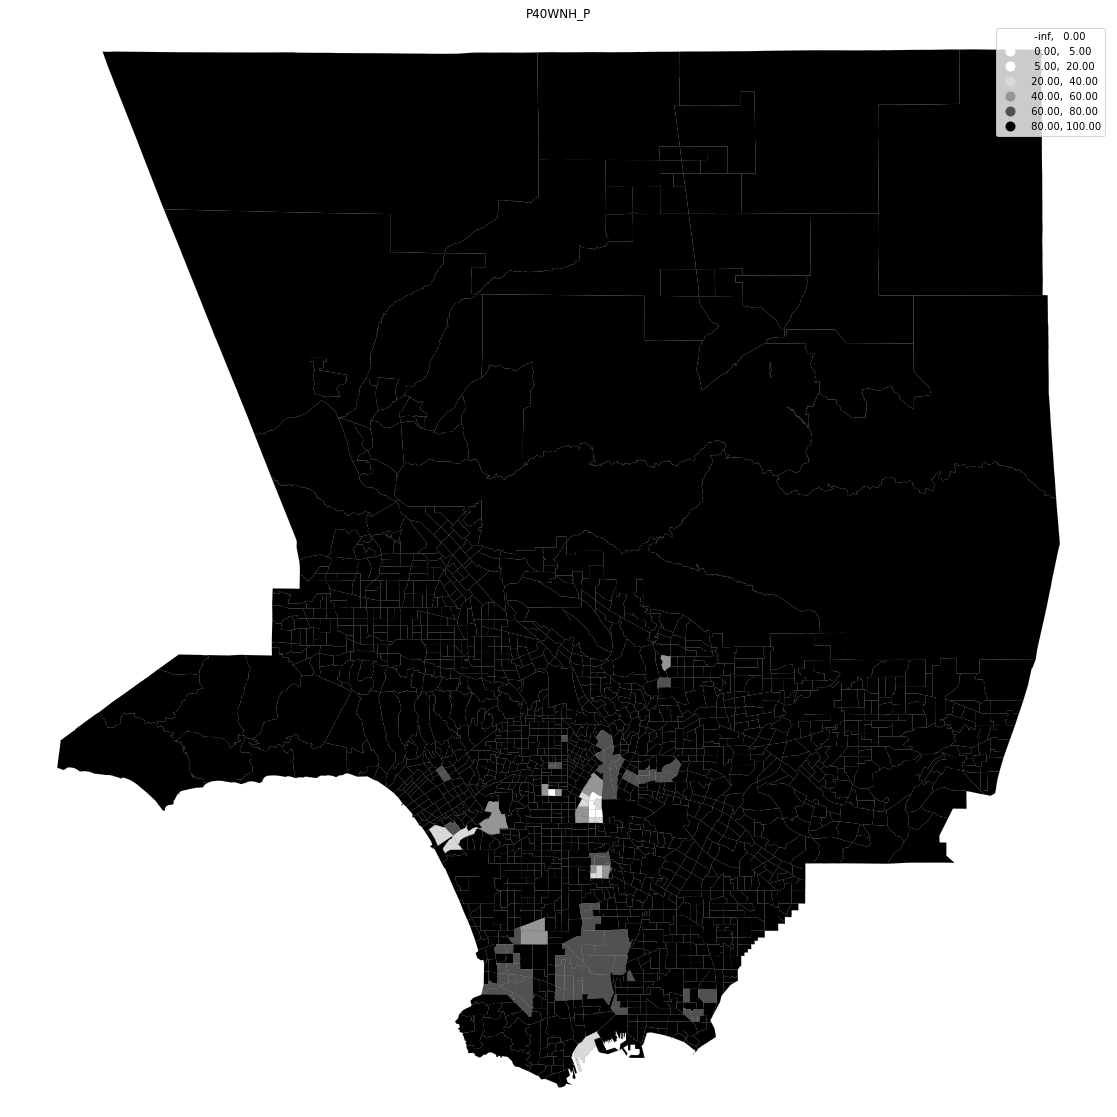

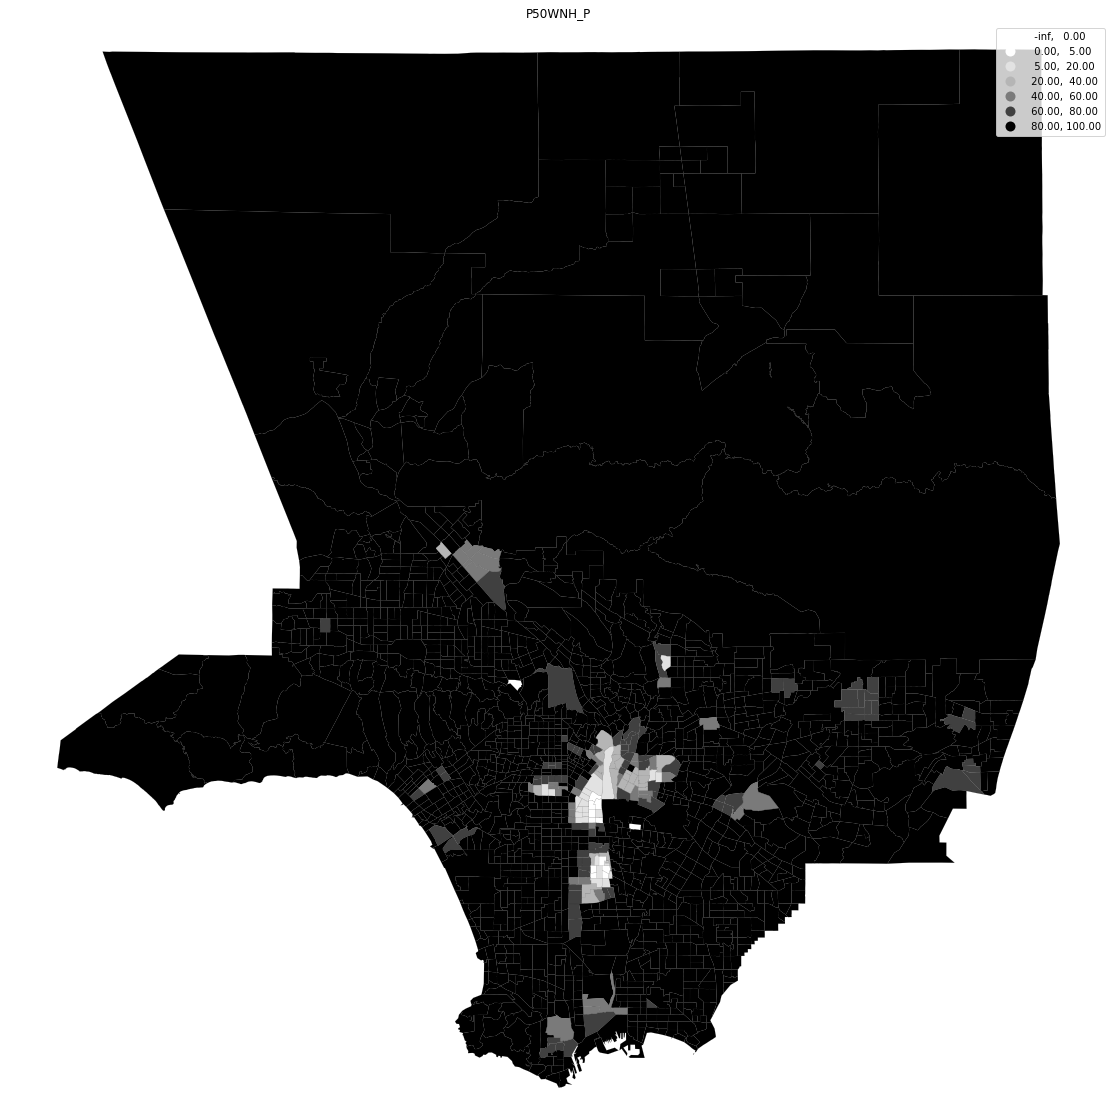

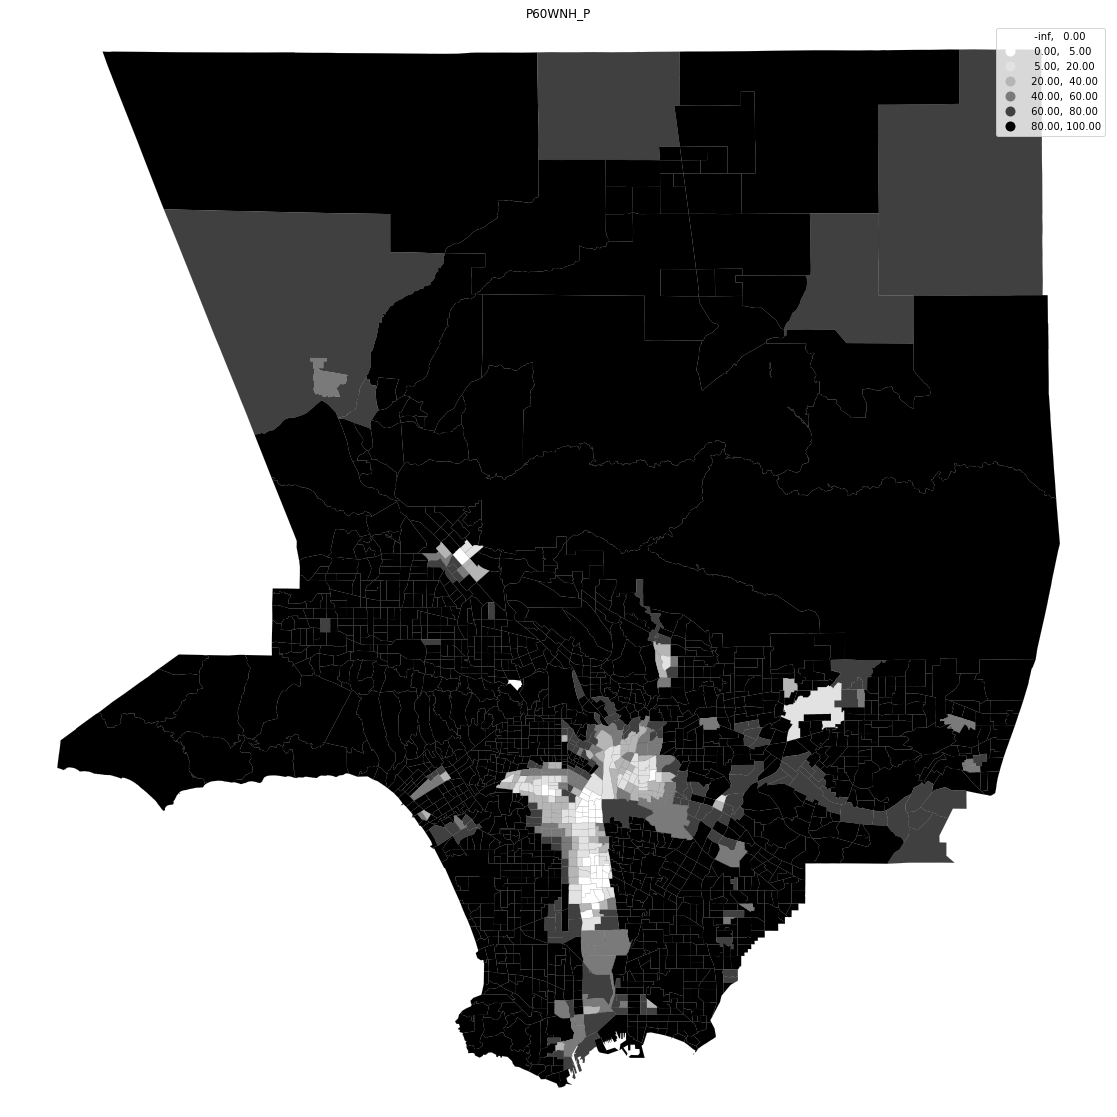

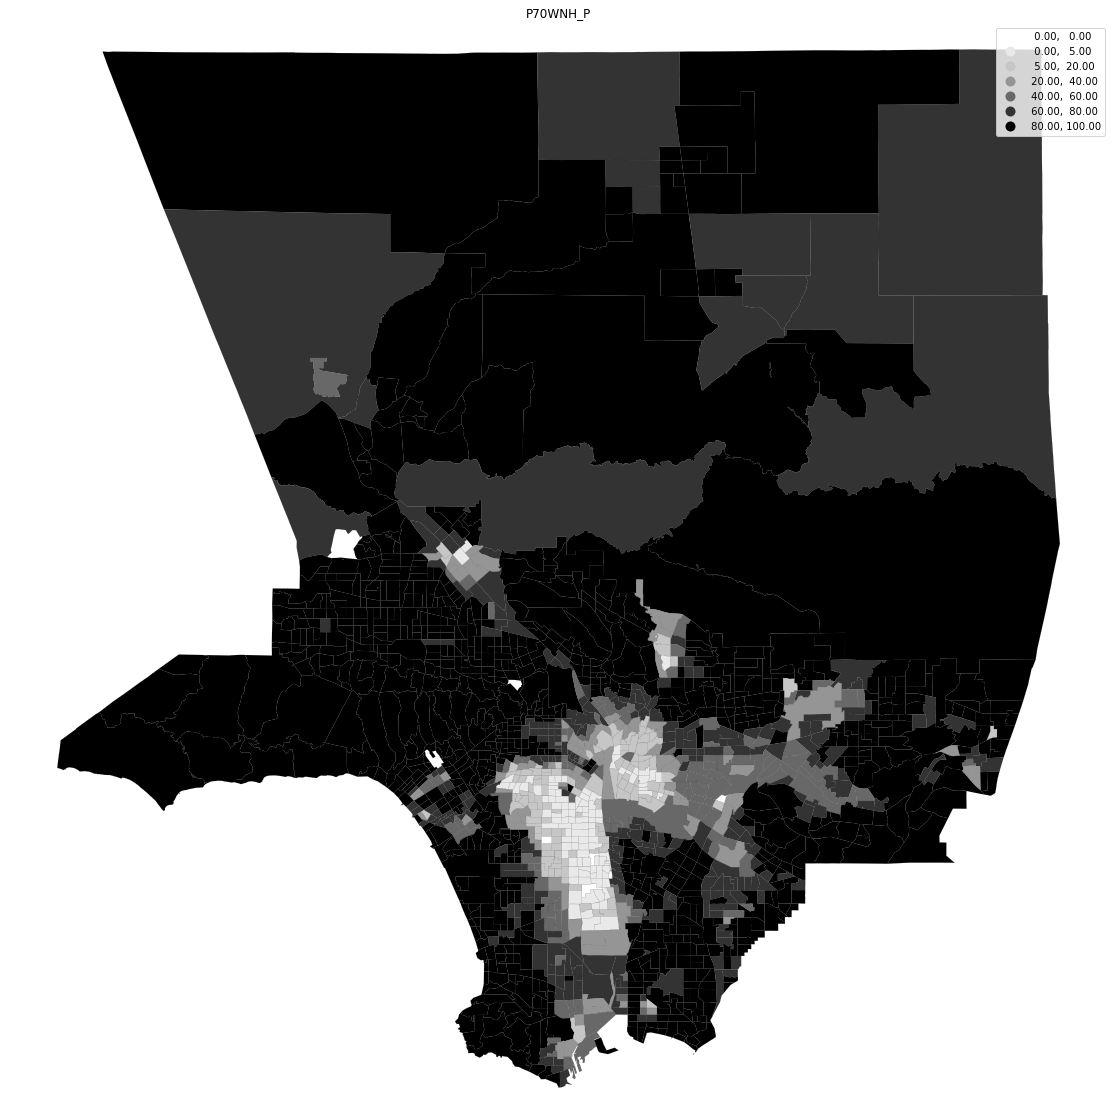

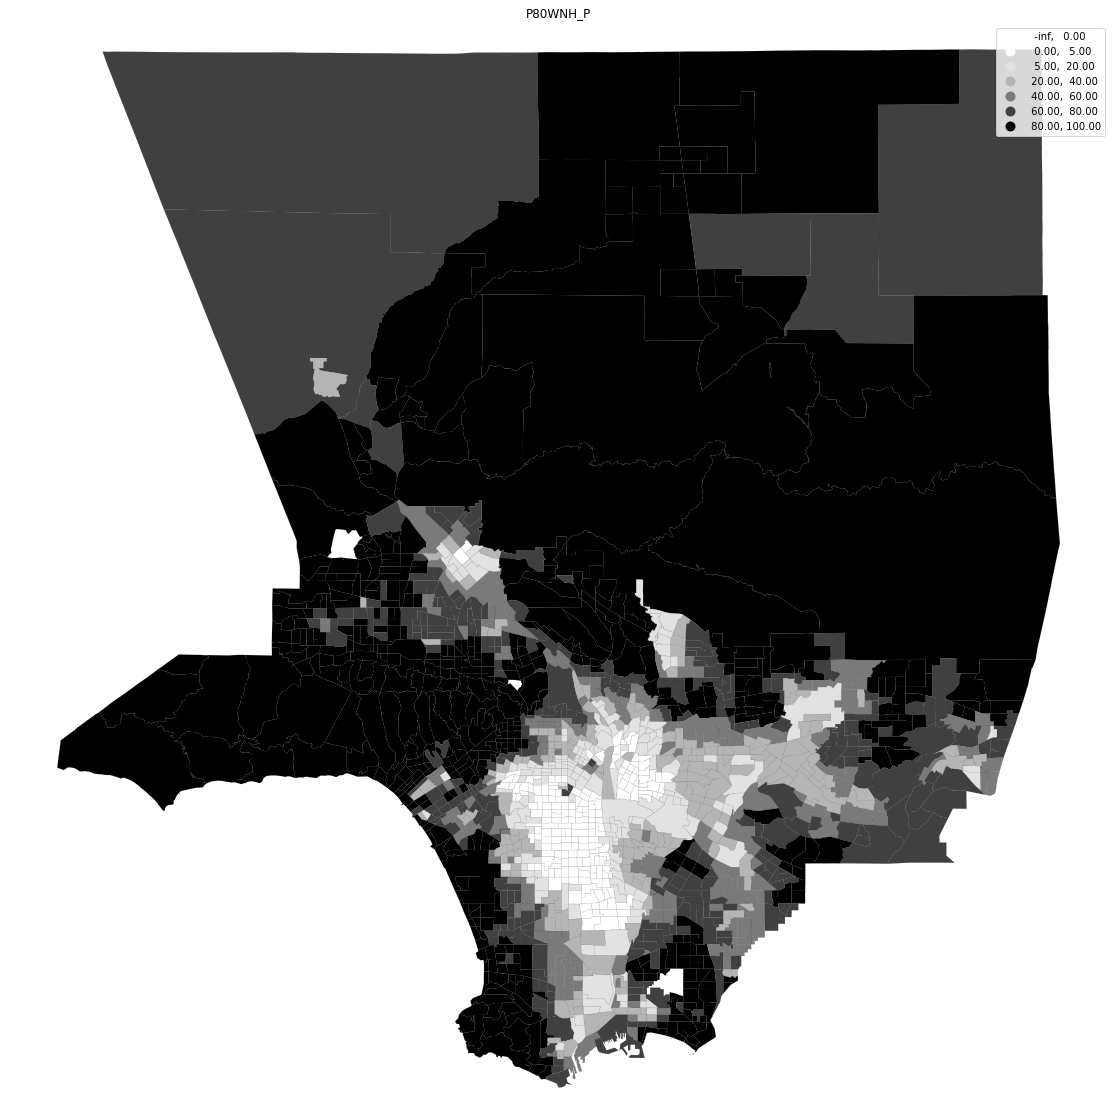

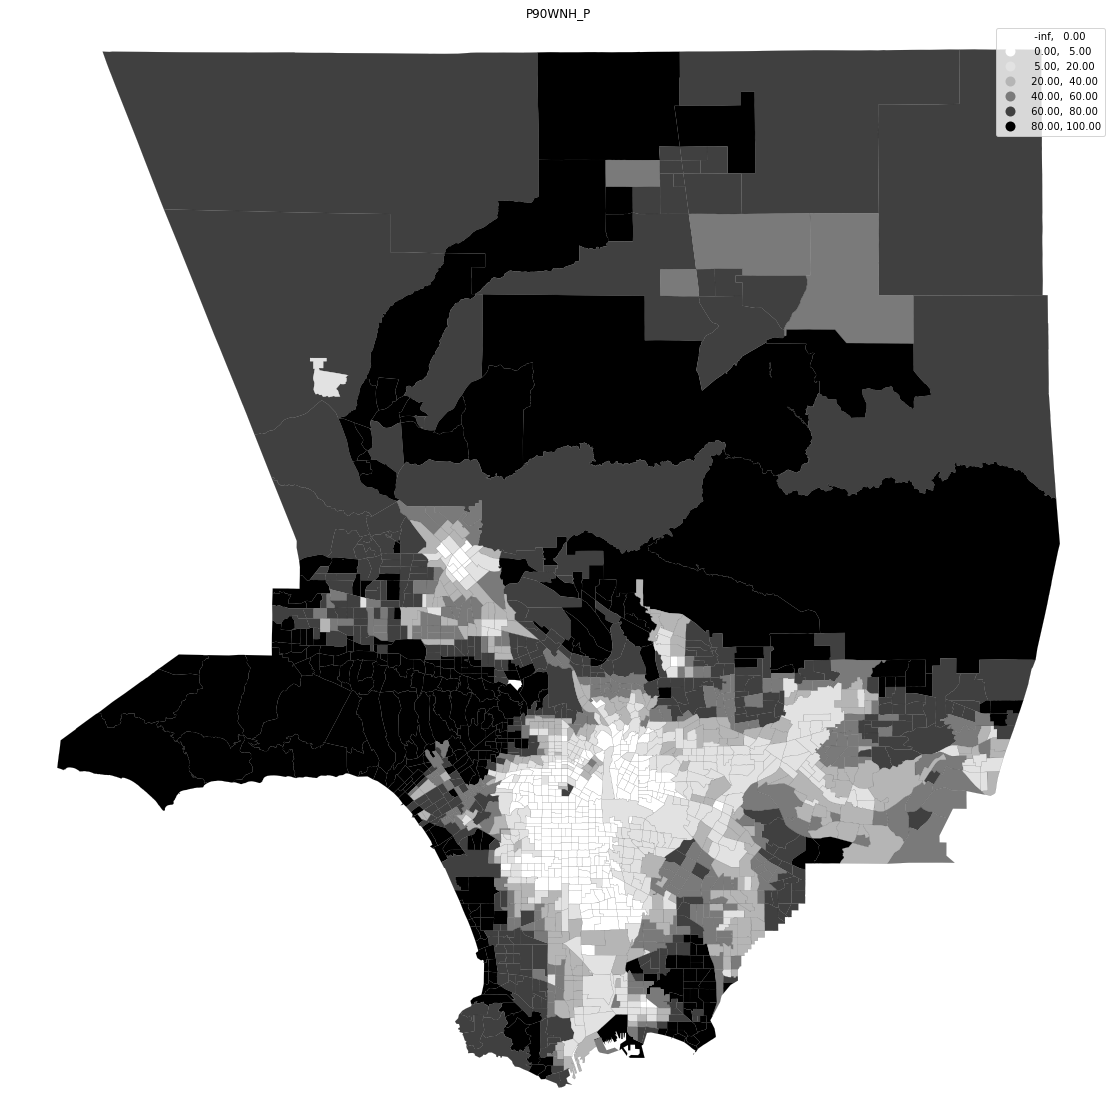

In [14]:
for var in white_var_list:
    ax = white.plot(figsize=(20,20),
            column=var,
            scheme='user_defined',
            classification_kwds={'bins':[0,5,20,40,60,80,100]},
            edgecolor='#222', 
            linewidth=0.1,
            legend=True,
                   cmap='Greys')
    ax.set_title(var)
    ax.axis("off")
    ax.set_ylim(520000, 650000)


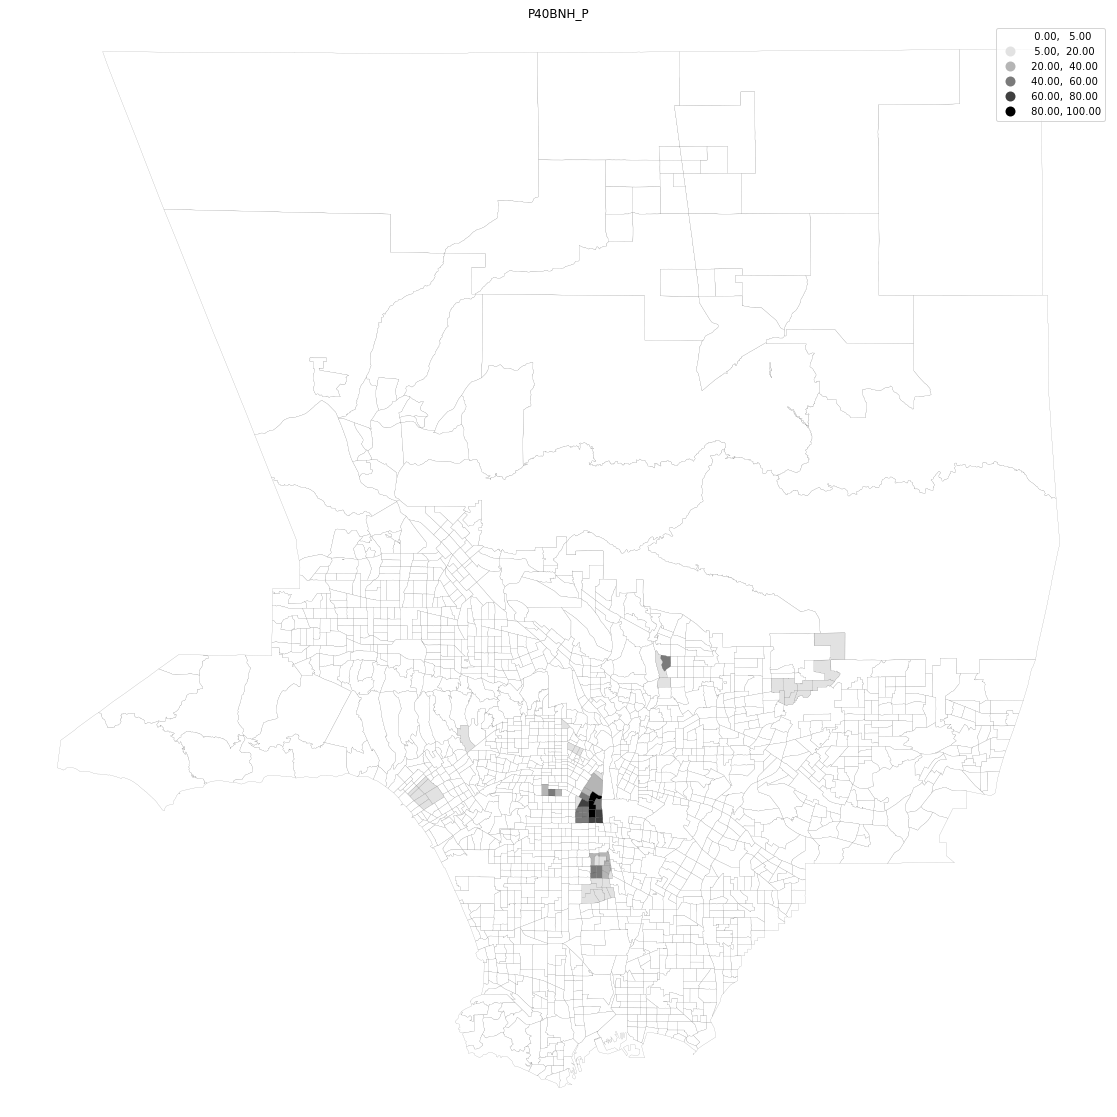

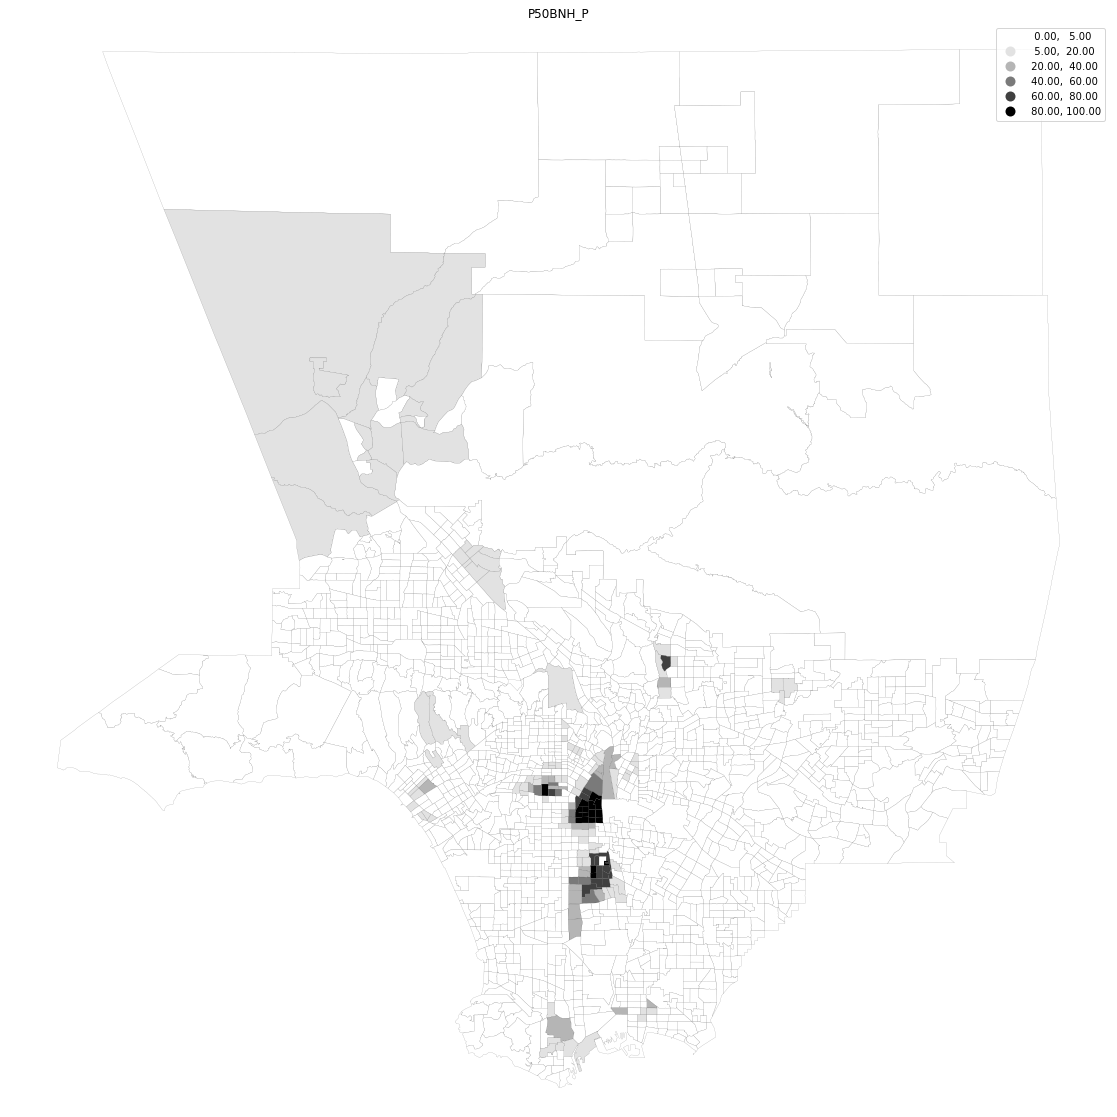

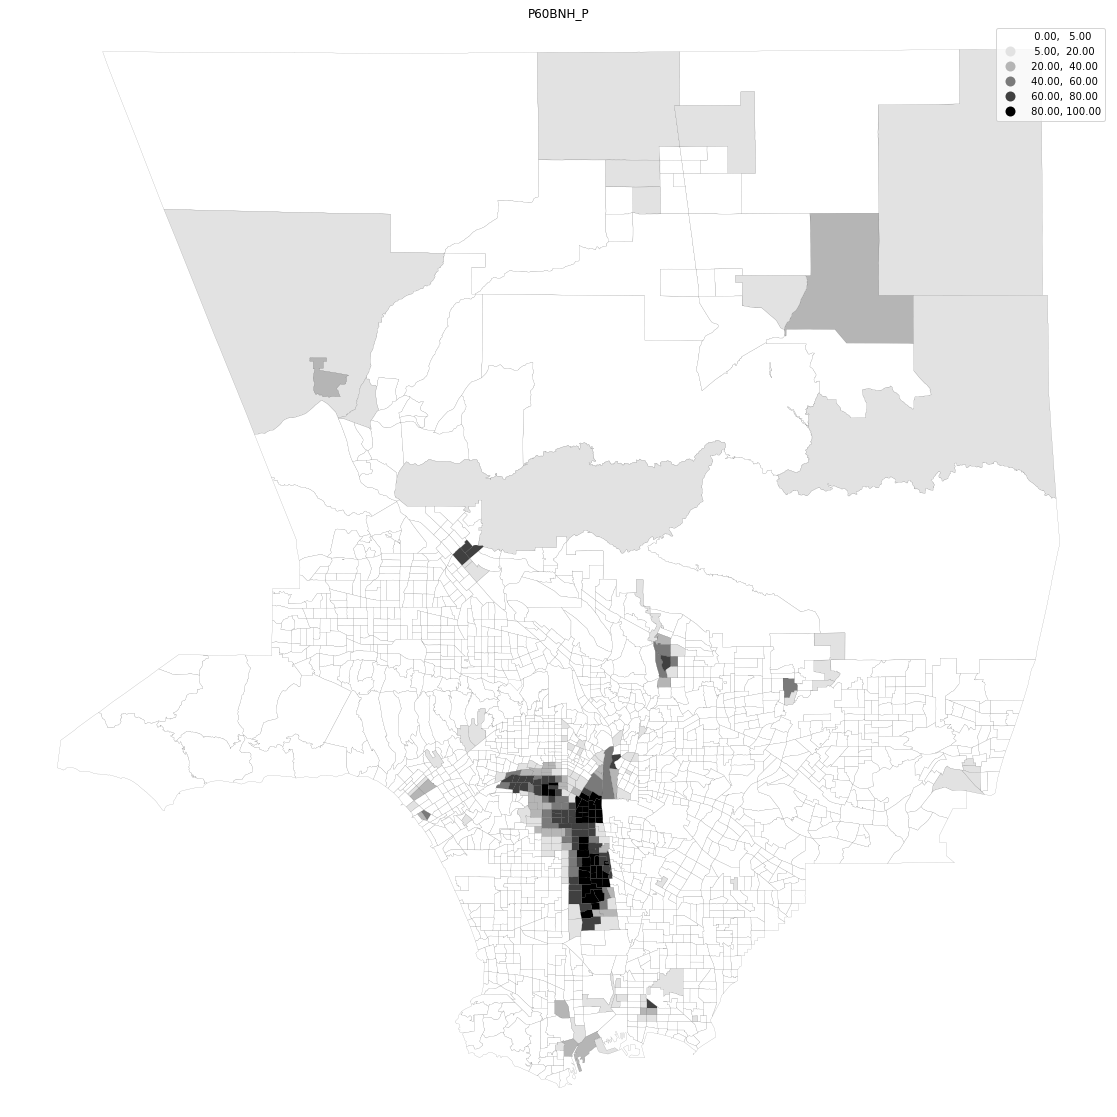

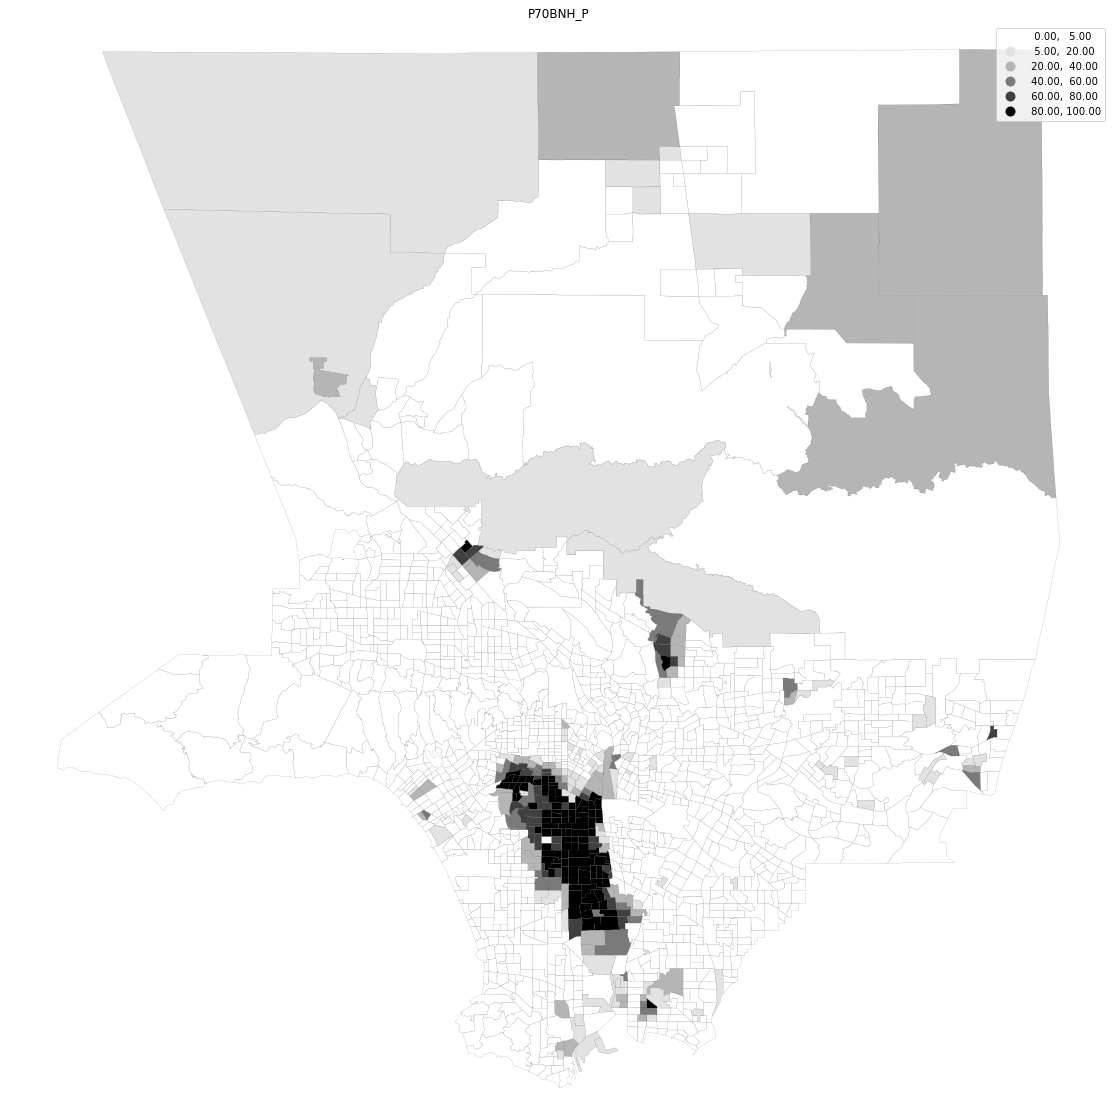

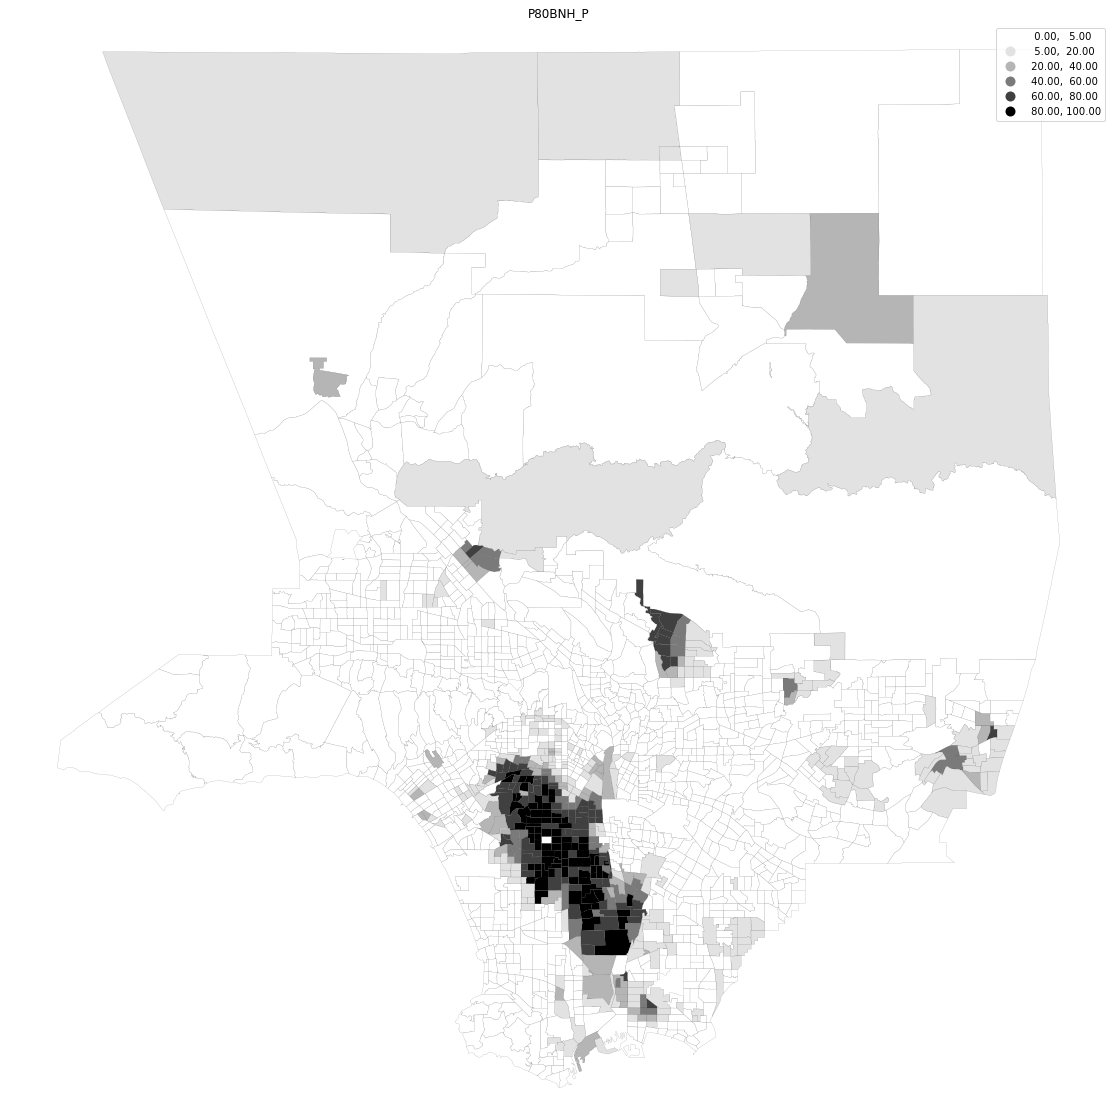

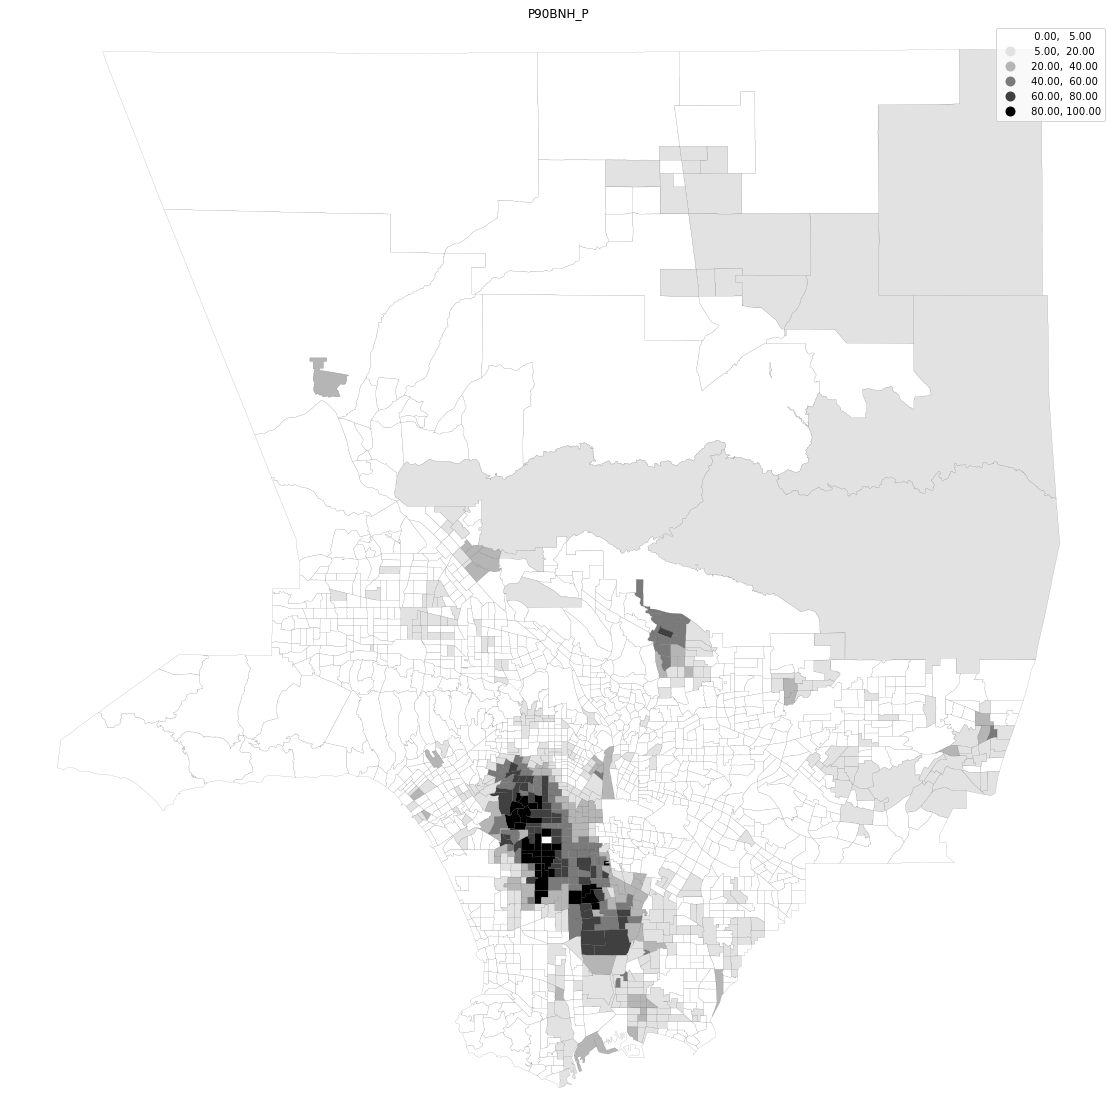

In [15]:
for var in black_var_list:
    ax = black.plot(figsize=(20,20),
            column=var,
            scheme='user_defined',
            classification_kwds={'bins':[5,20,40,60,80,100]},
            edgecolor='#222', 
            linewidth=0.1,
            legend=True,
                   cmap='Greys')
    ax.set_title(var)
    ax.axis("off")
    ax.set_ylim(520000, 650000)


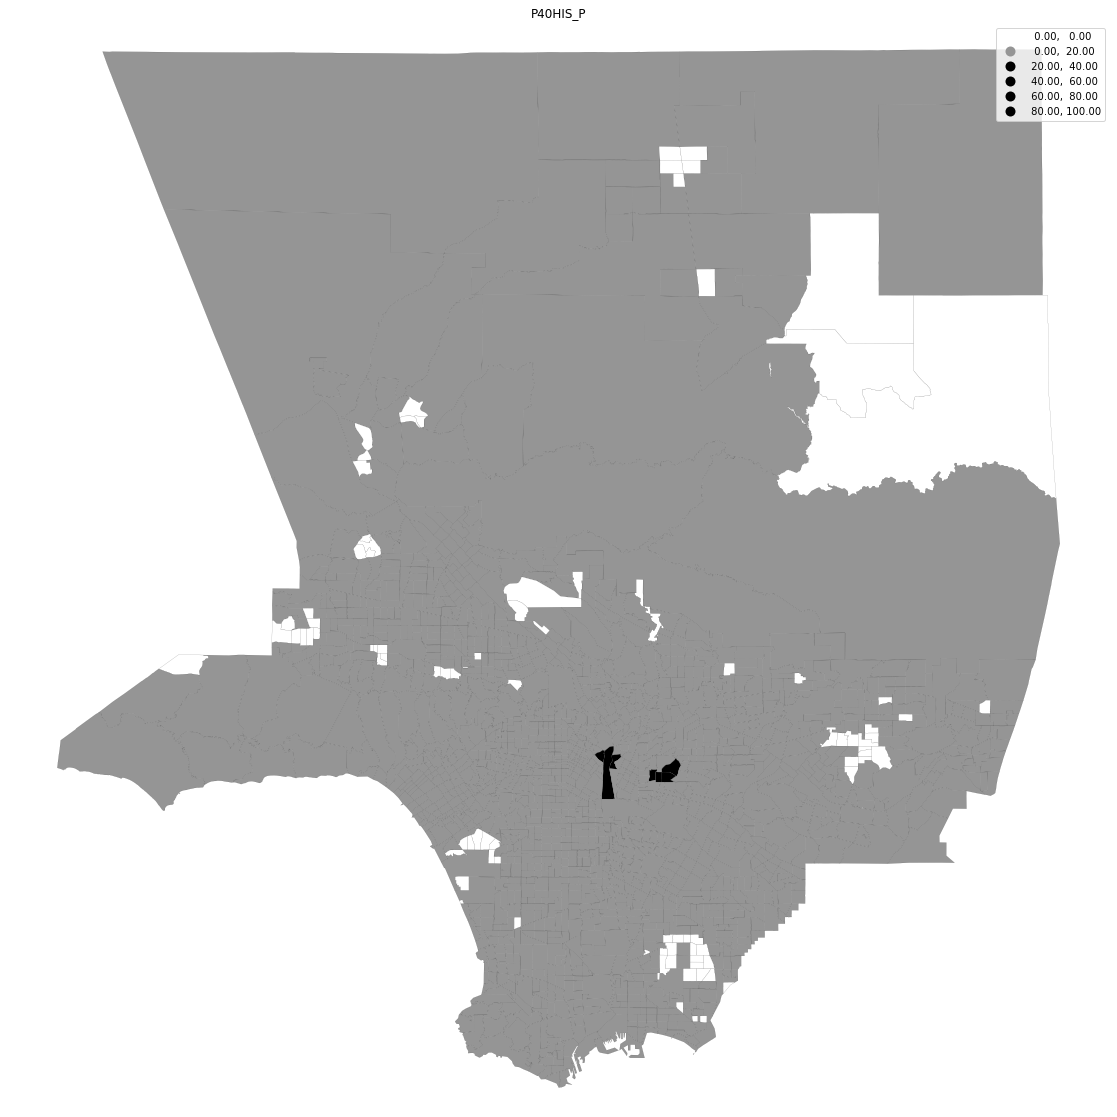

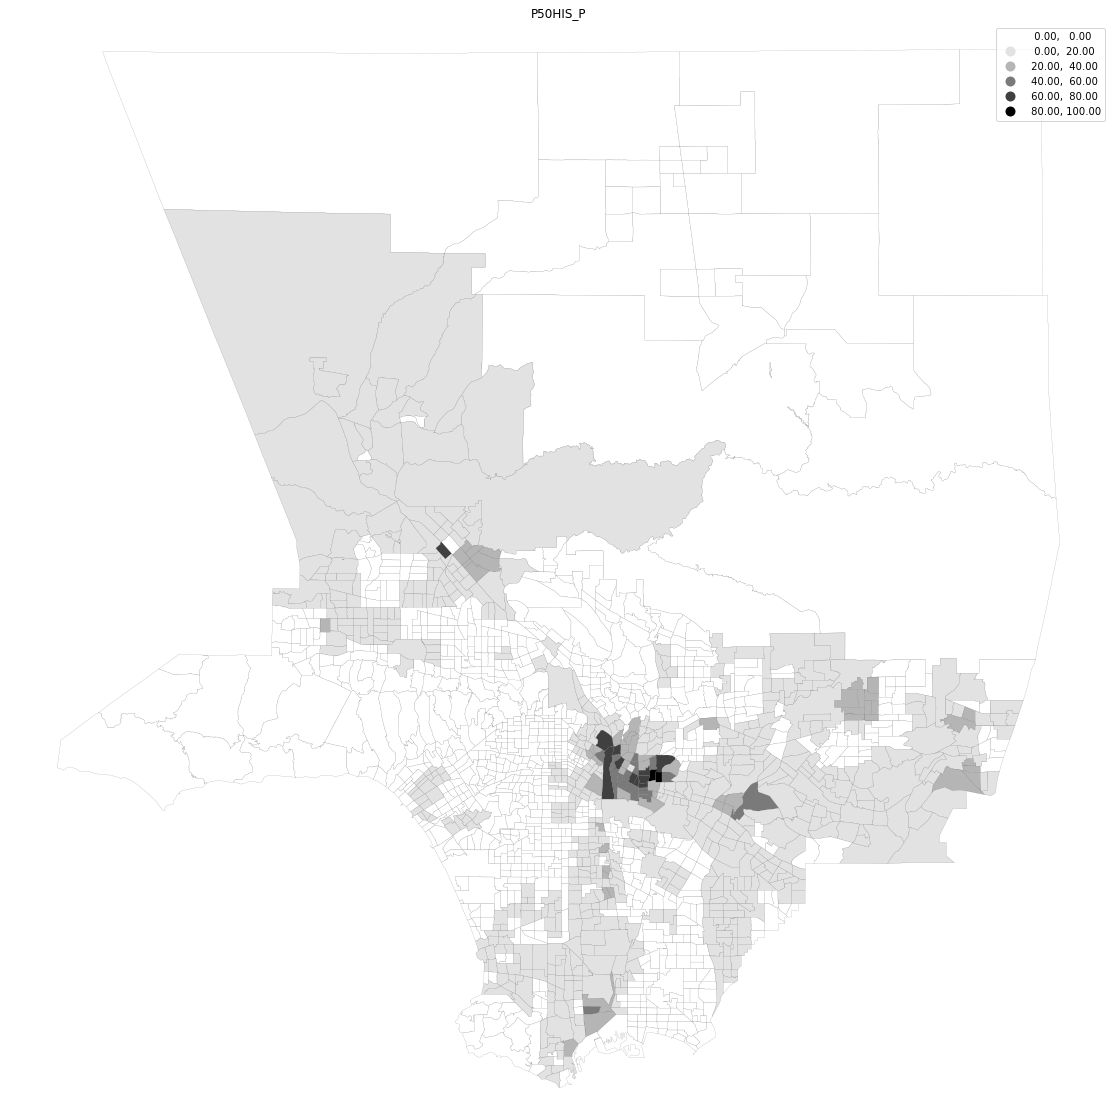

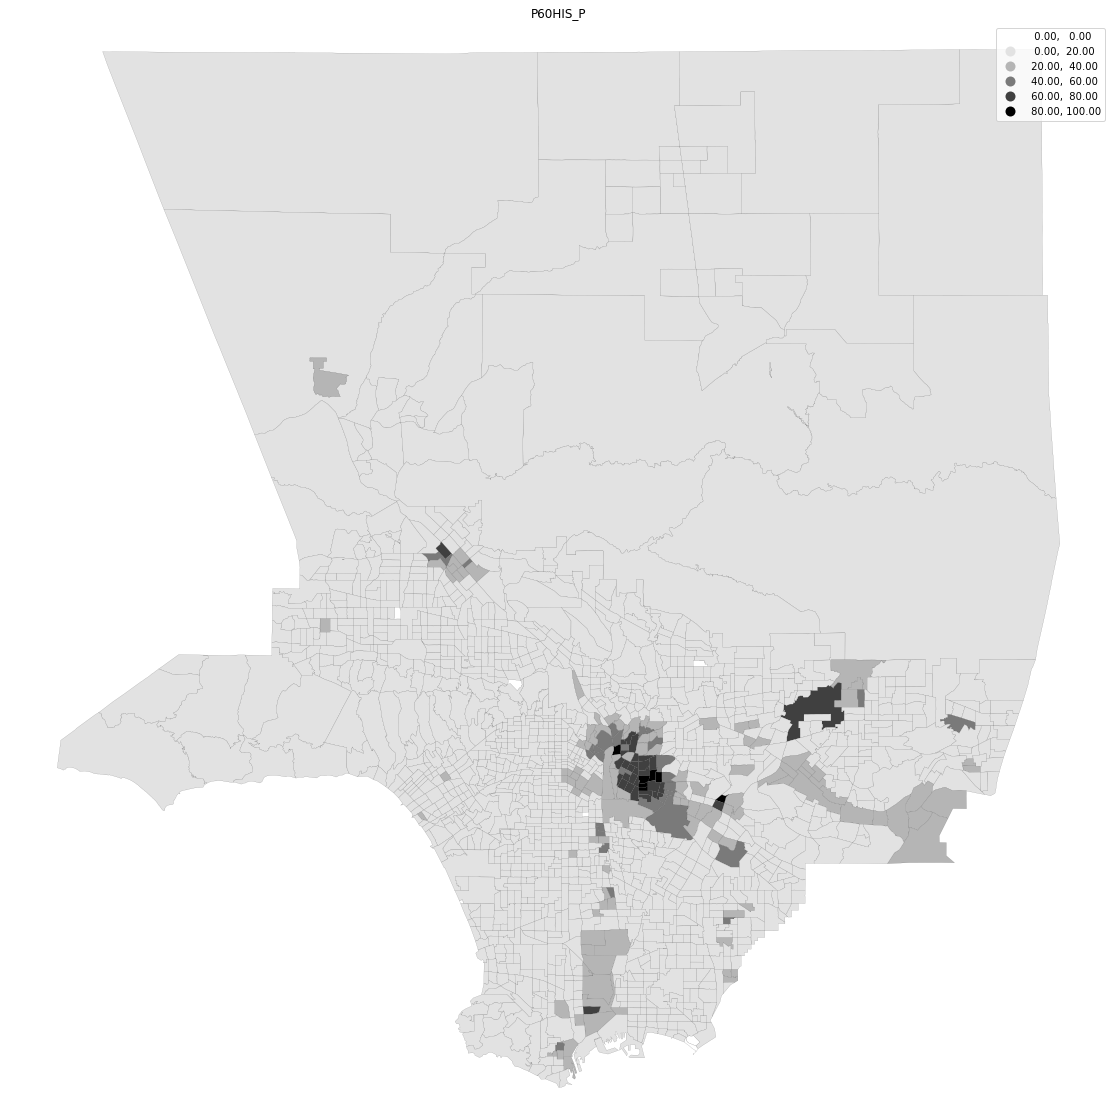

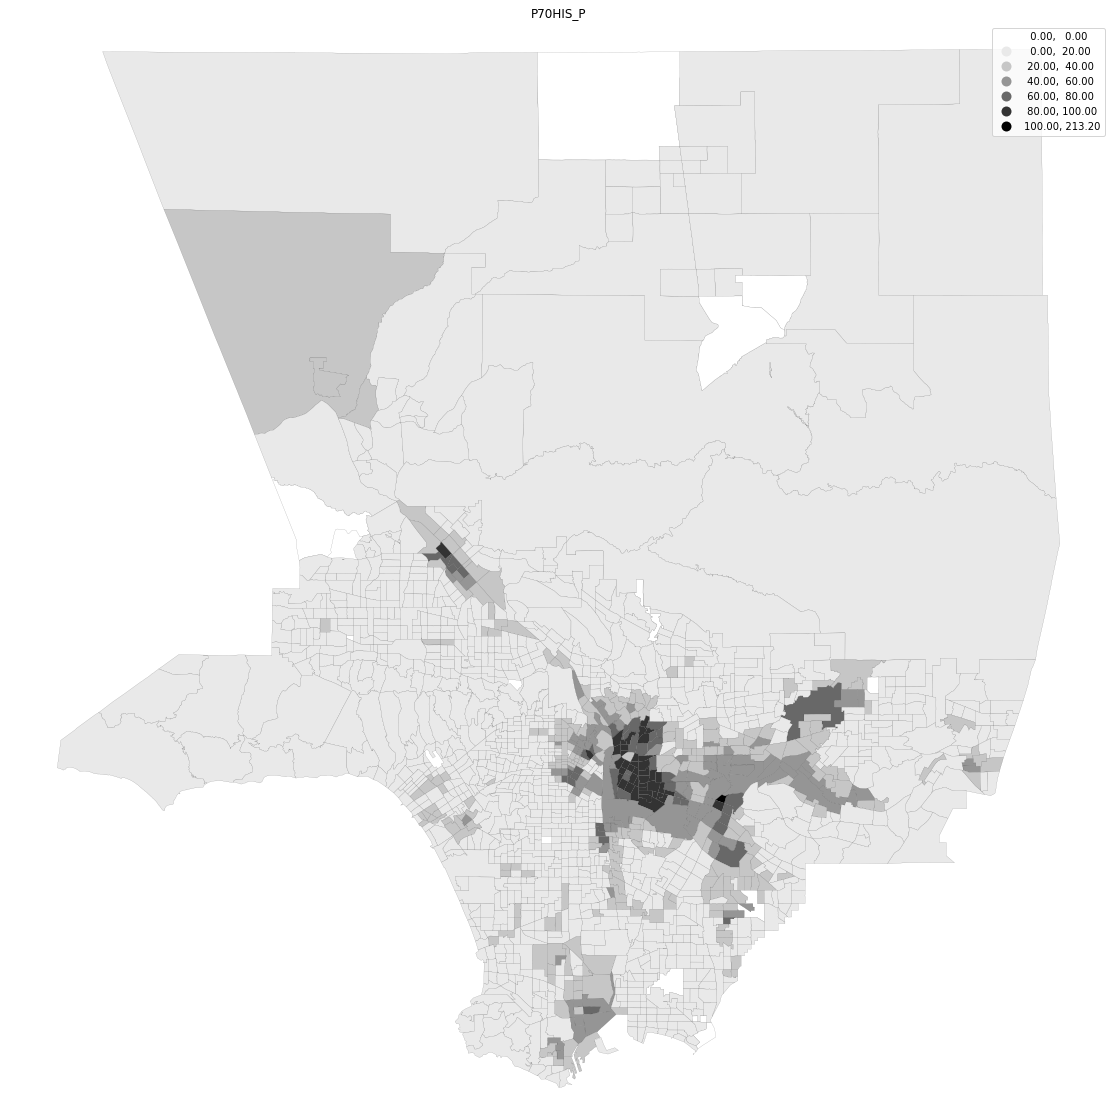

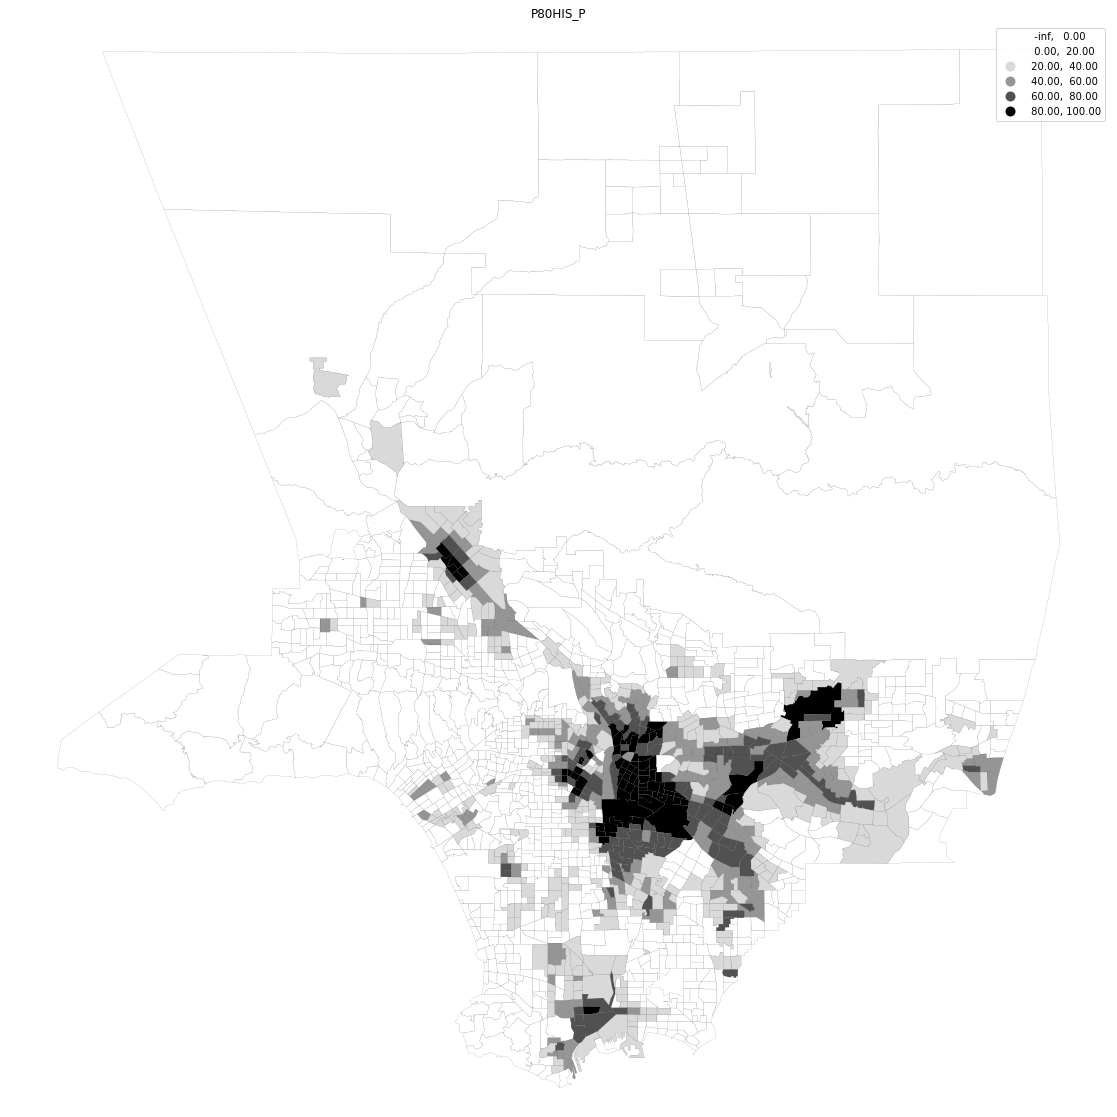

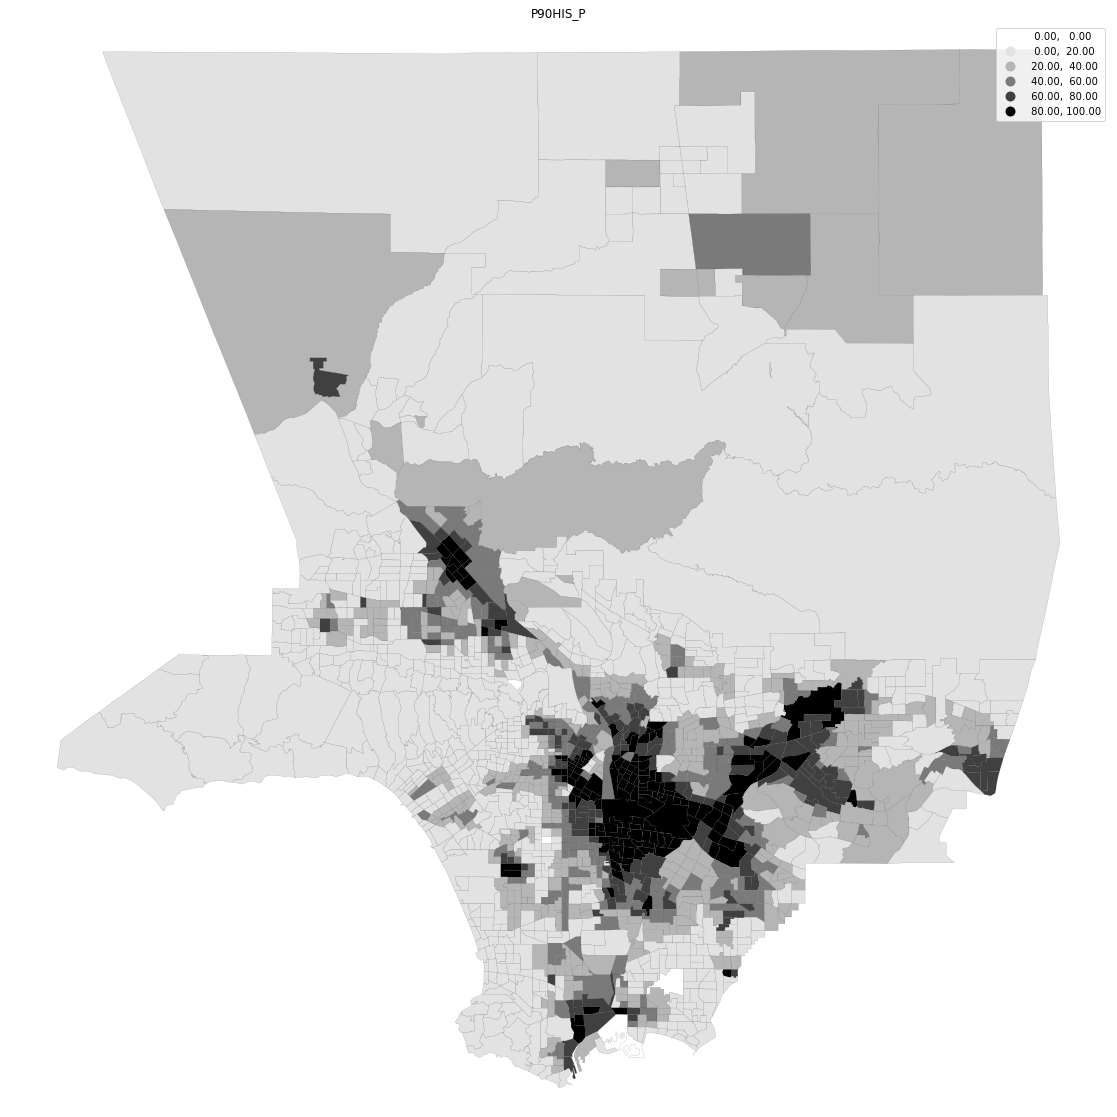

In [22]:
for var in hispanic_var_list:
    ax = hispanic.plot(figsize=(20,20),
            column=var,
            scheme='user_defined',
            classification_kwds={'bins':[0,20,40,60,80,100]},
            edgecolor='#222', 
            linewidth=0.1,
            legend=True,
                   cmap='Greys')
    ax.set_title(var)
    ax.axis("off")
    ax.set_ylim(520000, 650000)
